# Analytics & Applications WS23/24 Project

The following notebook contains the applied steps of the CRISP-DM model on the
project excercise from "Analytics and Applications" by Prof. Ketter in the WS23/24 of University Cologne.

The following steps will be done in the specified order:
1. Data Preparation
2. Modeling 
3. Evaluation

## Imports & Dependencies

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import json

## Import Data

In [10]:
df_charging = pd.read_pickle("data/charging_modified.pkl")
df_weather = pd.read_csv("data/weather_modified.csv")

## Data Exploration and Preparation

### Basic Data Exploration

In [11]:
print(df_charging.head())

                             id            connectionTime  \
Index                                                       
0      5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
1      5e23b149f9af8b5fe4b973d0 2020-01-02 13:36:50+00:00   
2      5e23b149f9af8b5fe4b973d1 2020-01-02 13:56:35+00:00   
3      5e23b149f9af8b5fe4b973d2 2020-01-02 13:59:58+00:00   
4      5e23b149f9af8b5fe4b973d3 2020-01-02 14:00:01+00:00   

                 disconnectTime          doneChargingTime  kWhDelivered  \
Index                                                                     
0     2020-01-02 19:11:15+00:00 2020-01-02 17:31:35+00:00        25.016   
1     2020-01-02 22:38:21+00:00 2020-01-02 20:18:05+00:00        33.097   
2     2020-01-03 00:39:22+00:00 2020-01-02 16:35:06+00:00         6.521   
3     2020-01-02 16:38:39+00:00 2020-01-02 15:18:45+00:00         2.355   
4     2020-01-02 22:08:40+00:00 2020-01-02 18:17:30+00:00        13.375   

      siteID  spaceID    stationID  userID  \


In [12]:
print(df_charging.info())

<class 'pandas.core.frame.DataFrame'>
Index: 66450 entries, 0 to 10087
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     66450 non-null  object             
 1   connectionTime         66450 non-null  datetime64[ns, UTC]
 2   disconnectTime         66450 non-null  datetime64[ns, UTC]
 3   doneChargingTime       62362 non-null  datetime64[ns, UTC]
 4   kWhDelivered           66450 non-null  float64            
 5   siteID                 66450 non-null  object             
 6   spaceID                66450 non-null  object             
 7   stationID              66450 non-null  object             
 8   userID                 66450 non-null  object             
 9   userInputs             49187 non-null  object             
 10  NoChargingTime         62362 non-null  timedelta64[ns]    
 11  NoChargingTimeMinutes  62362 non-null  float64            


In [13]:
print(df_charging.describe())

       kWhDelivered             NoChargingTime  NoChargingTimeMinutes  \
count  66450.000000                      62362           62362.000000   
mean      11.787916  0 days 02:51:11.421795324             171.190363   
std       10.314789  0 days 03:59:22.230088509             239.370501   
min        0.501000          -1 days +23:00:04             -59.933333   
25%        5.097000            0 days 00:00:14               0.233333   
50%        9.140000     0 days 01:36:48.500000              96.808333   
75%       14.183000            0 days 04:55:38             295.633333   
max      108.797242            6 days 12:07:17            9367.283333   

                    ChargingTime  ChargingTimeMinutes  kWhPerMinute  \
count                      62362         62362.000000  6.236200e+04   
mean   0 days 03:32:28.611109329           212.476852           inf   
std    0 days 03:03:19.652032849           183.327534           NaN   
min            -1 days +23:18:38           -41.366667 -8.9

In [14]:
print("Earliest Entry in the Dataset: " + str(df_charging['connectionTime'].min()))
print("Latest Entry in the Dataset: " + str(df_charging['connectionTime'].max()))

Earliest Entry in the Dataset: 2018-04-25 11:08:04+00:00
Latest Entry in the Dataset: 2021-09-14 05:43:39+00:00


In [15]:
# Initialize a Dataframe for Exploration
df_exploration = df_charging.set_index('connectionTime')

In [18]:
# TImeframe of missing data
# mask = (df_charging['connectionTime'] > '2020-08-04') & (df_charging['connectionTime'] <= '2020-11-18')
# missingData = df_charging.loc[mask]
# missingData

### Handle Missing and Erronous Data

### Calculate the Time a Car used the Station without Charging

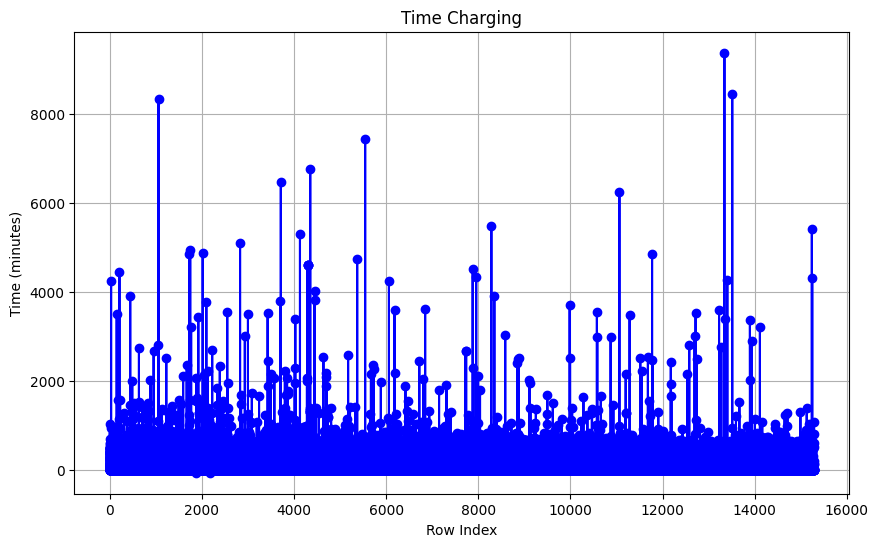

In [20]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df_charging['NoChargingTimeMinutes'], marker='o', linestyle='-', color='b')
plt.title('Time Charging')
plt.xlabel('Row Index')
plt.ylabel('Time (minutes)')
plt.grid(True)
plt.show()

### Calculate the Charging Time

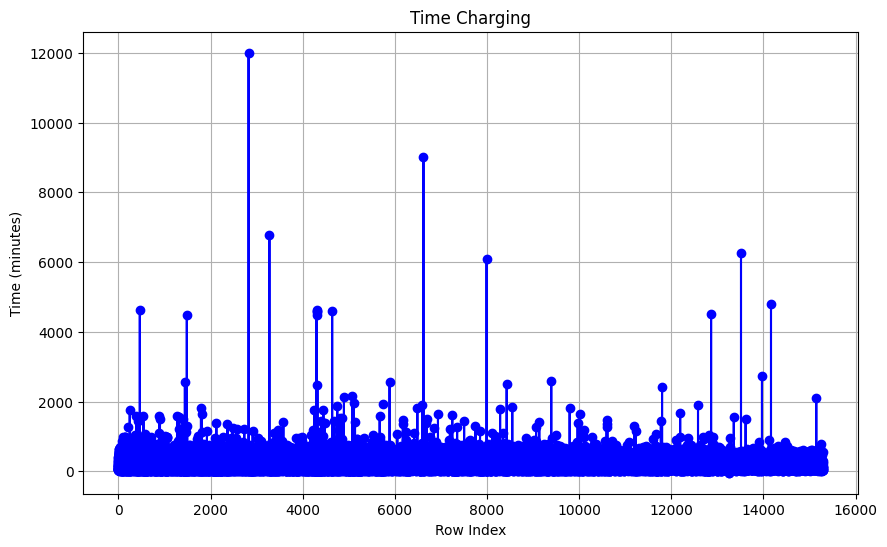

In [21]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df_charging['ChargingTimeMinutes'], marker='o', linestyle='-', color='b')
plt.title('Time Charging')
plt.xlabel('Row Index')
plt.ylabel('Time (minutes)')
plt.grid(True)
plt.show()

### Calculate Outliers with the IQR

In [22]:
# Calculate the interquartile range (IQR) for time differences
Q1 = df_charging['ChargingTimeMinutes'].quantile(0.25)
Q3 = df_charging['ChargingTimeMinutes'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers based on IQR (e.g., 1.5 times IQR)
threshold = 1.5

# Identify outliers based on IQR
outliers = df_charging[(df_charging['ChargingTimeMinutes'] > (Q3 + threshold * IQR))]

# Display or further analyze the outliers
print("Outliers based on IQR:")
print(outliers)

Outliers based on IQR:
                             id            connectionTime  \
Index                                                       
6      5e23b149f9af8b5fe4b973d5 2020-01-02 14:09:14+00:00   
29     5e23b149f9af8b5fe4b973ec 2020-01-02 16:28:23+00:00   
81     5e28f766f9af8b70ebc91c98 2020-01-06 12:32:26+00:00   
83     5e28f766f9af8b70ebc91c9a 2020-01-06 12:48:56+00:00   
164    5e2a48e8f9af8b75aed8e931 2020-01-07 13:47:26+00:00   
...                         ...                       ...   
10041  5d574ad2f9af8b4c10c03628 2019-07-31 13:19:31+00:00   
10051  5d574ad2f9af8b4c10c03632 2019-07-31 13:49:27+00:00   
10058  5d574ad2f9af8b4c10c03639 2019-07-31 14:04:17+00:00   
10059  5d574ad2f9af8b4c10c0363a 2019-07-31 14:05:20+00:00   
10080  5d574ad2f9af8b4c10c0364f 2019-07-31 14:48:11+00:00   

                 disconnectTime          doneChargingTime  kWhDelivered  \
Index                                                                     
6     2020-01-03 01:57:58+00:00 2

### Split the Stations in to a new Column Station with have the entry 1 or 2

In [23]:
# Create a new column 'is_1_or_2' based on whether 'stationID' starts with '1' or '2'
df_charging['station'] = df_charging['stationID'].astype(str).apply(lambda x: '1' if x.startswith('1') else '2' if x.startswith('2') else None)

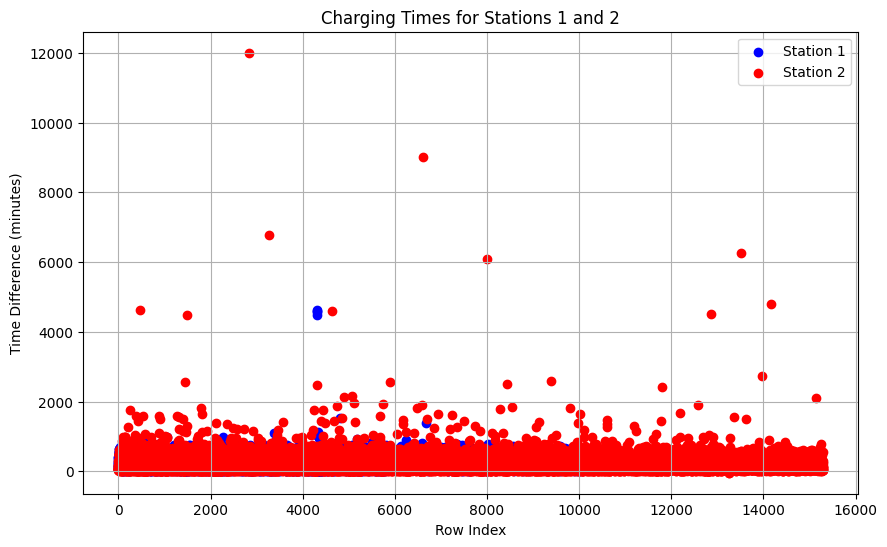

In [24]:
# Plot the time differences for station 1 in blue and station 2 in red
plt.figure(figsize=(10, 6))

# Plot time differences for station 1 (blue)
plt.scatter(df_charging[df_charging['station'] == '1'].index, df_charging[df_charging['station'] == '1']['ChargingTimeMinutes'], color='blue', label='Station 1')

# Plot time differences for station 2 (red)
plt.scatter(df_charging[df_charging['station'] == '2'].index, df_charging[df_charging['station'] == '2']['ChargingTimeMinutes'], color='red', label='Station 2')

plt.title('Charging Times for Stations 1 and 2')
plt.xlabel('Row Index')
plt.ylabel('Time Difference (minutes)')
plt.legend()
plt.grid(True)
plt.show()

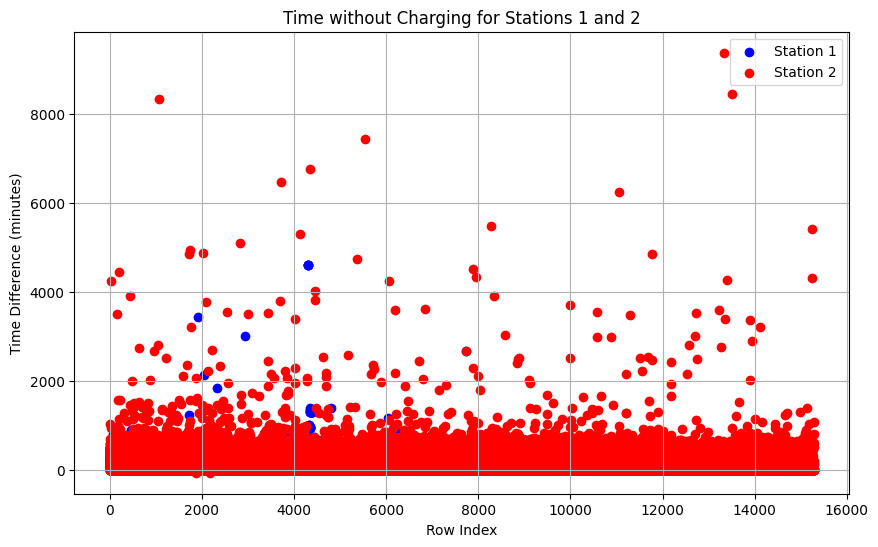

In [25]:
# Plot the time differences for station 1 in blue and station 2 in red
plt.figure(figsize=(10, 6))

# Plot time differences for station 1 (blue)
plt.scatter(df_charging[df_charging['station'] == '1'].index, df_charging[df_charging['station'] == '1']['NoChargingTimeMinutes'], color='blue', label='Station 1')

# Plot time differences for station 2 (red)
plt.scatter(df_charging[df_charging['station'] == '2'].index, df_charging[df_charging['station'] == '2']['NoChargingTimeMinutes'], color='red', label='Station 2')

plt.title('Time without Charging for Stations 1 and 2')
plt.xlabel('Row Index')
plt.ylabel('Time Difference (minutes)')
plt.legend()
plt.grid(True)
plt.show()

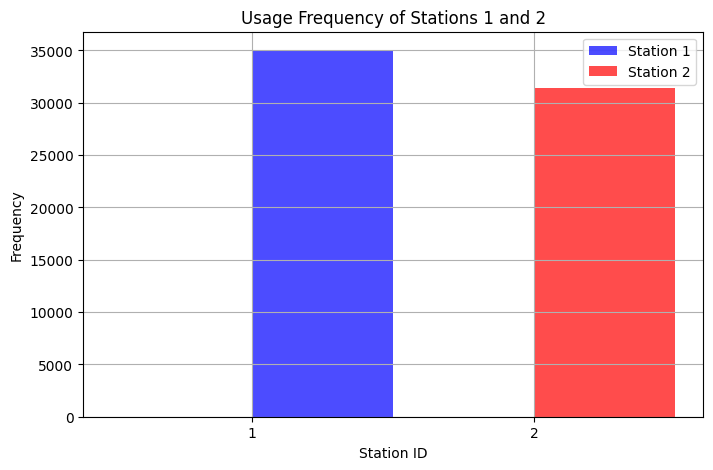

In [26]:
# Plot a histogram for the usage frequency of each station
plt.figure(figsize=(8, 5))

# Plot histogram for station 1
plt.hist(df_charging[df_charging['station'] == '1']['station'], bins=2, color='blue', alpha=0.7, label='Station 1')

# Plot histogram for station 2
plt.hist(df_charging[df_charging['station'] == '2']['station'], bins=2, color='red', alpha=0.7, label='Station 2')

plt.title('Usage Frequency of Stations 1 and 2')
plt.xlabel('Station ID')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

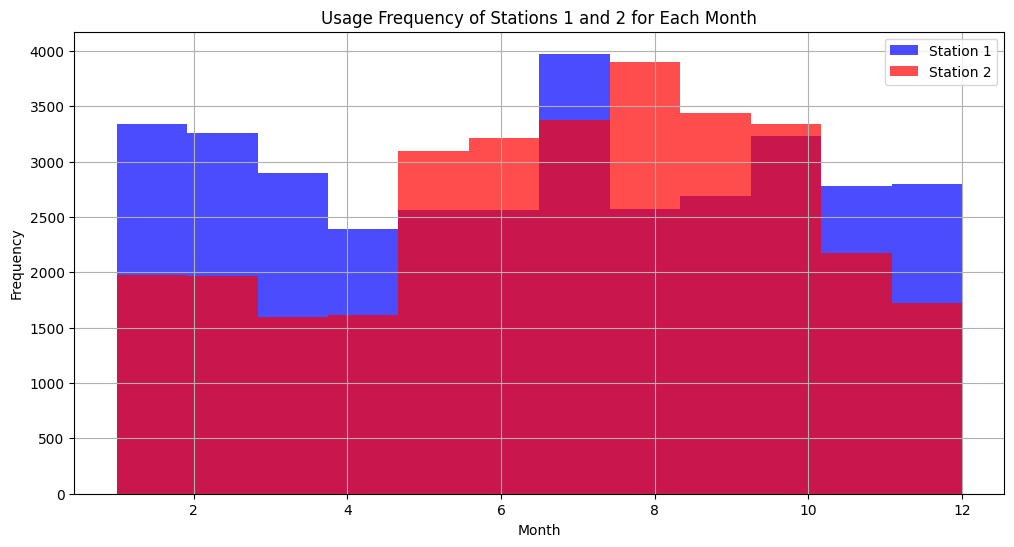

In [27]:
# Plot the usage frequency of stations for every month
plt.figure(figsize=(12, 6))

# Plot histogram for station 1
plt.hist(df_charging[df_charging['station'] == '1']['month'], bins=12, color='blue', alpha=0.7, label='Station 1')

# Plot histogram for station 2
plt.hist(df_charging[df_charging['station'] == '2']['month'], bins=12, color='red', alpha=0.7, label='Station 2')

plt.title('Usage Frequency of Stations 1 and 2 for Each Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Group by day and calculate the mean temperature for each day
df_weather_mean_per_day = df_weather.groupby(df_weather['timestamp'].dt.date)['temperature'].mean().reset_index()

# Display or save the resulting DataFrame
print(df_weather_mean_per_day)

       timestamp  temperature
0     2018-01-01    14.000000
1     2018-01-02    16.041667
2     2018-01-03    17.916667
3     2018-01-04    16.791667
4     2018-01-05    17.375000
...          ...          ...
1092  2020-12-28    10.000000
1093  2020-12-29     8.416667
1094  2020-12-30    11.240000
1095  2020-12-31    11.360000
1096  2021-01-01    12.500000

[1097 rows x 2 columns]


         key_0                        id            connectionTime  \
0            2  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
1            2  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
2            2  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
3            2  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
4            2  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
...        ...                       ...                       ...   
2365126     26  5d50b34ff9af8b34f280b3ec 2019-07-26 23:43:11+00:00   
2365127     26  5d50b34ff9af8b34f280b3ec 2019-07-26 23:43:11+00:00   
2365128     26  5d50b34ff9af8b34f280b3ec 2019-07-26 23:43:11+00:00   
2365129     26  5d50b34ff9af8b34f280b3ec 2019-07-26 23:43:11+00:00   
2365130     26  5d50b34ff9af8b34f280b3ec 2019-07-26 23:43:11+00:00   

                   disconnectTime          doneChargingTime  kWhDelivered  \
0       2020-01-02 19:11:15+00:00 2020-01-02 17:31:35+00:00        25.016   
1    

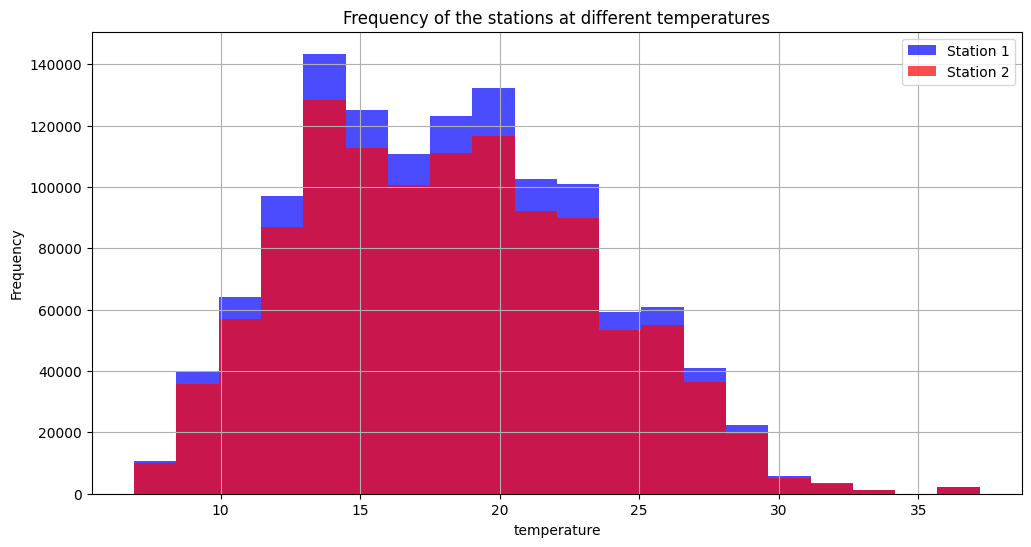

In [29]:
df_weather_mean_per_day['timestamp'] = pd.to_datetime(df_weather_mean_per_day['timestamp'])

# Merge the two dataframes based on the day of the month
merged_df = pd.merge(df_charging, df_weather_mean_per_day, left_on=df_charging['connectionTime'].dt.day, right_on=df_weather_mean_per_day['timestamp'].dt.day, how='inner')
print(merged_df[merged_df['station'] == '1'])
# Create a line plot of average temperature against the day of the month
plt.figure(figsize=(12, 6))

plt.hist(merged_df[merged_df['station'] == '1']['temperature'], bins=20, color='blue', alpha=0.7, label='Station 1')

plt.hist(merged_df[merged_df['station'] == '2']['temperature'], bins=20, color='red', alpha=0.7, label='Station 2')

plt.title('Frequency of the stations at different temperatures')
plt.xlabel('temperature')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# TODO Annabelle:
# Schauen wie die durchschnittswerte sind --> Vielleicht kommen verteilungen daher
# Anschauen, wie häufig eine Station am Tag im Schnitt genutzt wird

# TODO Freddy:
# - Expand User Inputs column > drop user ID from user Inputs column, since its redundant
# Erroneous Data:
#   NAT for Charging Done Time (largerThan = df_charging[df_charging['doneChargingTime'].isnull()])
#   Too long charging Times + Volumes (Check Realistic Charging Rate)
#   Gap in Fall 2020